# 💻 Statiske kart

I løpet av de siste ukene har vi allerede blitt kjent med plotting av
grunnleggende statiske kart ved hjelp av
[`geopandas.GeoDataFrame.plot()`](http://geopandas.org/mapping.html), for
eksempel i leksjonene [4](#04_geopandas),
[7](#07_romlig_kobling), og [9](#09_reklassifisering). Vi lærte også
at `geopandas.GeoDataFrame.plot()` bruker `matplotlib.pyplot`
biblioteket, og at [de fleste av argumentene og alternativene blir akseptert av
geopandas](https://matplotlib.org/stable/api/pyplot_summary.html).

For å friske opp hukommelsen om det grunnleggende i å plotte kart, la oss lage et statisk
befolkningskart over Oslo, som også viser veier og
metro linjer (tre lag, overlappet hverandre). Husk at inputdataene må være i samme koordinatsystem!


## Data

Vi vil bruke tre forskjellige datasett:
- Befolkningsrutenettet for Oslo som vi brukte i [leksjon
  09](#09_reklassifisering), som ligger i `DATA_MAPPE /
"ssb_rutenett"`,
- T-bane nettverket i Oslo, som er hentet fra OpenStreetMap,
  og
- et forenklet nettverk av de største veiene i Oslo,
  også hentet fra OpenStreetMap.

In [19]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_MAPPE = NOTEBOOK_PATH / "data"

In [20]:
import geopandas
import numpy

rutenett = geopandas.read_file(
    DATA_MAPPE
    / "ssb_rutenett"
    / "befolkning_250m_2023_oslo.gpkg"
)

tbane = geopandas.read_file(DATA_MAPPE / "osm_data" / "osm_oslo_tbane.gpkg")

veier = geopandas.read_file(DATA_MAPPE / "osm_data" / "osm_oslo_roads.geojson")

:::{admonition} Koordinatreferansesystemer
:class: attention

Husk at forskjellige geo-dataframes må være i samme koordinatsystem
før de plottes på samme kart. `geopandas.GeoDataFrame.plot()` utfører ikke
reprosjisering av data automatisk.

Du kan alltid sjekke det med en enkel `assert` uttalelse.
:::

In [3]:
assert rutenett.crs == tbane.crs == veier.crs, "Inndataenes CRS er forskjellige"

AssertionError: Inndataenes CRS er forskjellige

Hvis flere datasett ikke deler et felles CRS, finn ut først hvilket CRS
de har tilknyttet (hvis noe!), deretter transformere dataene til et felles referansesystem:

In [4]:
rutenett.crs

<Projected CRS: PROJCS["UTM_Zone_33_Northern_Hemisphere",GEOGCS["G ...>
Name: UTM_Zone_33_Northern_Hemisphere
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [5]:
tbane.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
veier.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
veier = veier.to_crs(tbane.crs)
rutenett = rutenett.to_crs(tbane.crs)

In [8]:
assert rutenett.crs == tbane.crs == veier.crs, "Inndataenes CRS er forskjellige"

## Plotting et flerlagskart

:::{admonition} Sjekk forståelsen din
:class: hint

Fullfør de neste trinnene i ditt eget tempo (tøm først kodecellene).
Sørg for å gå tilbake til tidligere leksjoner hvis du føler deg usikker på hvordan du fullfører
en oppgave.

- Visualiser et flerlagskart ved hjelp av `geopandas.GeoDataFrame.plot()` metoden;
- først, plott befolkningsrutenettet ved hjelp av et 'kvantil' klassifiseringsskjema,
- deretter, legg til veinettverk og tbane-linjer i samme plott (husk `ax`
  parameter)
:::


Husk følgende alternativer som kan sendes til `plot()`:
- stil polygonlaget:
    - definer et klassifiseringsskjema ved hjelp av `scheme` parameteren
    - [endre fargekartet ved hjelp av
      `cmap`](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
    - kontroller lagets gjennomsiktighet med `alpha` parameteren (`0` er fullt
      gjennomsiktig, `1` fullt ugjennomsiktig)
- stil linjelagene:
    - juster [linjefargen](https://matplotlib.org/stable/api/colors_api.html) ved hjelp av
      `color` parameteren
    - endre `linewidth`, etter behov

Lagene har forskjellige omfang (`veier` dekker et større område). Du kan
bruke aksenes (`ax`) metoder `set_xlim()` og `set_ylim()` for å sette den horisontale
og vertikale utstrekningen av kartet (f.eks. til en geodataframes `total_bounds`).

(59.81254725710192, 60.121271590196386)

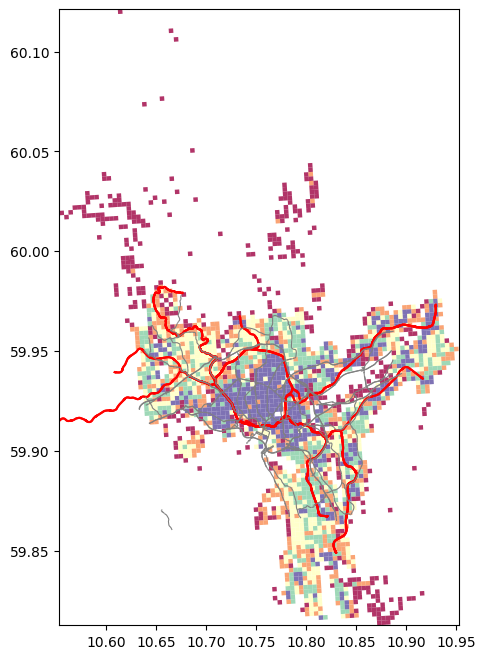

In [9]:
ax = rutenett.plot(
    figsize=(12, 8),

    column="pop_tot",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8
)

tbane.plot(
    ax=ax,
    color="red",
    linewidth=1.5
)

veier.plot(
    ax=ax,
    color="grey",
    linewidth=0.8
)

minx, miny, maxx, maxy = rutenett.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

## Legge til en legend

For å plotte en legend/tegnforklaring for et kart, legg til parameteren `legend=True`.

For figurer uten et klassifiserings-`scheme`, består legenden av en farget
gradient bar. Legend er en instans av
[`matplotlib.pyplot.colorbar.Colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html),
og alle argumenter definert i `legend_kwds` blir sendt gjennom til den. Se nedenfor
hvordan du bruker `label` egenskapen for å sette *legend tittelen*:

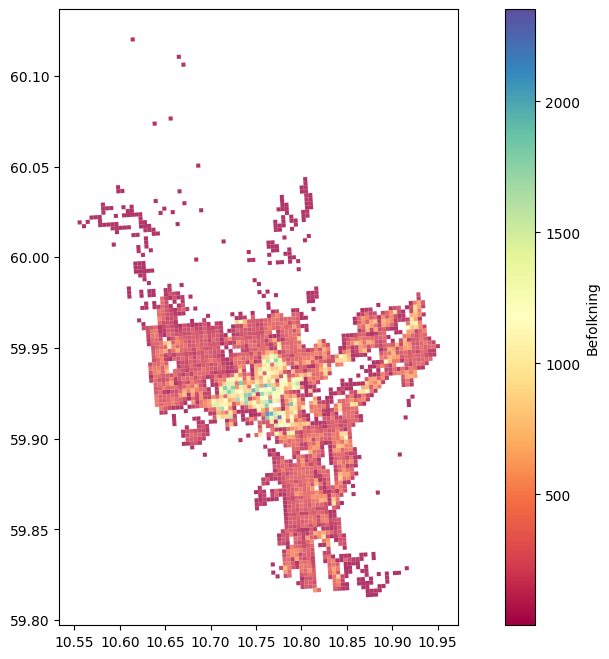

In [10]:
ax = rutenett.plot(
    figsize=(12, 8),

    column="pop_tot",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"label": "Befolkning"}
)

:::{admonition} Sett andre `Colorbar` parametere
:class: hint

Sjekk ut [`matplotlib.pyplot.colorbar.Colorbar`’s
dokumentasjon](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)
og eksperimenter med andre parametere! Alt du legger til i `legend_kwds`
ordboken vil bli sendt til fargebaren.
:::


---

For figurer som bruker et klassifisering `scheme`, på den annen side, `plot()`
lager en
[`matplotlib.legend.Legend`](https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend).
Igjen, `legend_kwds` blir sendt gjennom, men parameterne er litt
forskjellige: for eksempel, bruk `title` i stedet for `label` for å sette legenden
tittel:

<Axes: >

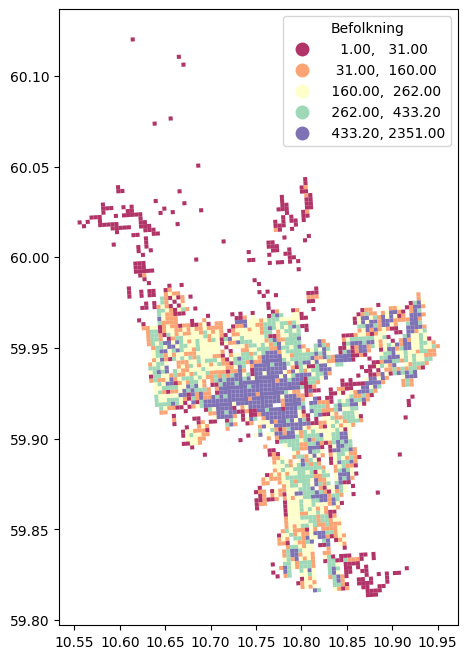

In [11]:
rutenett.plot(
    figsize=(12, 8),

    column="pop_tot",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Befolkning"}
)

:::{admonition} Sett andre `Legend` parametere
:class: hint

Sjekk ut [`matplotlib.pyplot.legend.Legend`’s
dokumentasjon](https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend),
og eksperimenter med andre parametere! Alt du legger til i `legend_kwds`
ordboken vil bli sendt til legenden.

Hvilket `legend_kwds` nøkkelord vil spre legenden over to kolonner?
:::


## Legge til et basekart

For bedre orientering er det ofte nyttig å legge til et basekart i et kartplott. En
basekart, for eksempel, fra kartleverandører som
[OpenStreetMap](https://osm.org/) eller [Stamen](https://maps.stamen.com/), legger til
gater, stedsnavn, og annen kontekstuell informasjon.

Python-pakken [contextily](https://contextily.readthedocs.io/) tar seg av
nedlasting av nødvendige kartfliser og gjengir dem i en geopandas plot.

:::{admonition} Web Mercator
:class: caution

Kartfliser fra online kartleverandører er typisk i [Web Mercator-projeksjon
(EPSG:3857](http://spatialreference.org/ref/sr-org/epsg3857-wgs84-web-mercator-auxiliary-sphere/).
Det er generelt tilrådelig å transformere alle andre lag til `EPSG:3857`, også.
:::

In [12]:
rutenett = rutenett.to_crs("EPSG:3857")
tbane = tbane.to_crs("EPSG:3857")
veier = veier.to_crs("EPSG:3857")

For å legge til et bakgrunnskart i et eksisterende plot, bruk
[`contextily.add_basemap()`](https://contextily.readthedocs.io/en/latest/intro_guide.html)
funksjonen, og gi plotets `ax`-objektet som ble lagd i et tidligere trinn.

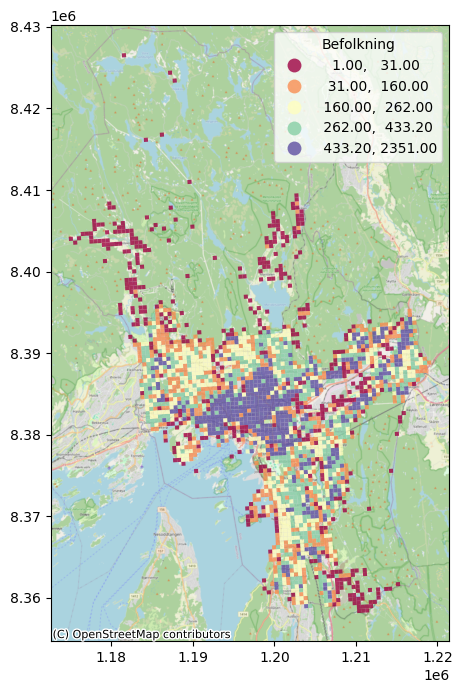

In [17]:
import contextily

ax = rutenett.plot(
    figsize=(12, 8),

    column="pop_tot",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Befolkning"}
)
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

[Det er mange
andre nettbaserte kart å velge
fra](https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers).
Alle de andre `contextily.providers` (se lenke ovenfor) kan sendes som en
`source` til `add_basemap()`. Du kan få en liste over tilgjengelige leverandører:

In [14]:
contextily.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

På dette zoomnivået, lever fordelene ved å bruke OpenStreetMap (som stedsnavn)
ikke opp til sitt fulle potensial. La oss se på et delsett av reisetidsmatrisen:
befolkningsdataene som er har bare 15 innbyggere.

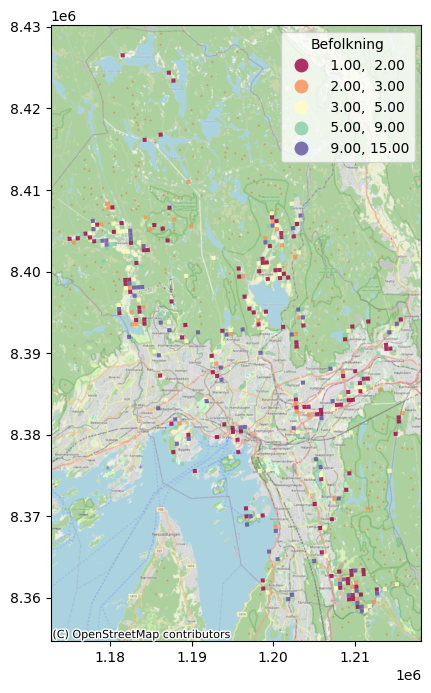

In [15]:
ax = rutenett[rutenett.pop_tot <= 15].plot(
    figsize=(12, 8),

    column="pop_tot",
    scheme="quantiles",
    k=5,
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Befolkning"}
)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik
)

Til slutt kan vi endre tilskrivningen (copyright-meldingen) som vises i
nederste venstre hjørne av kartplottet. Merk at du alltid skal respektere kart
leverandørenes bruksvilkår, som vanligvis inkluderer en datakilde-attribusjon
(*contextily*’s standarder tar hånd om dette). Vi kan og bør imidlertid
legge til en datakilde for alle lag vi la til, sånn som befolkningsdatasettet:

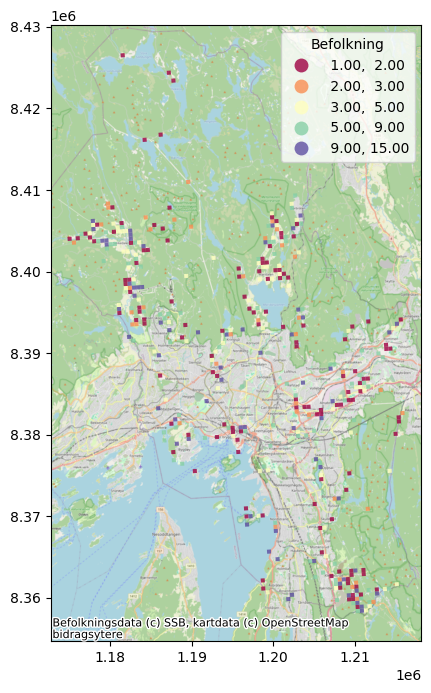

In [18]:
ax = rutenett[rutenett.pop_tot <= 15].plot(
    figsize=(12, 8),

    column="pop_tot",
    scheme="quantiles",
    k=5,
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Befolkning"}
)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik,
    attribution=(
        "Befolkningsdata (c) SSB, "
        "kartdata (c) OpenStreetMap bidragsytere"
    )
)